[View in Colaboratory](https://colab.research.google.com/github/pankajraj007/machine-learning/blob/master/Two_Dimentional_Classification_Using_Linear_Model.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

In [5]:
uploaded = files.upload()

Saving target.npy to target.npy


In [0]:
with open('train.npy','rb') as fin:
  X = np.load(fin)

with open('target.npy','rb') as fin:
  y = np.load(fin)

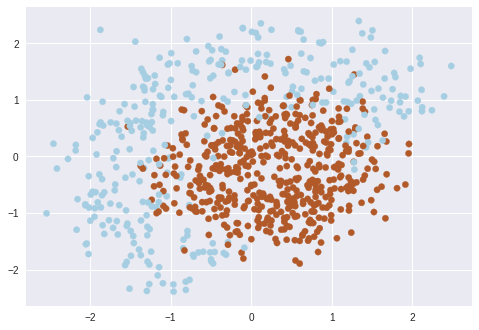

In [11]:
plt.scatter(X[:,0],X[:,1], c=y, cmap = plt.cm.Paired, s = 40)

In [0]:
 def expand(X):
    
  a = X[:,0]
  b = X[:,1]
  c= np.power(a,2)
  d = np.power(b,2)
  e= np.multiply(a,b)
  f=np.ones((a.T.shape))
  z = np.vstack((a,b,c,d,e,f)).T
  
  return z

In [0]:
X_expanded = expand(X)
#X_expanded

In [0]:
def probability(X,w):
  
  p = 1/(1+ np.exp(-1*np.dot(X,w)))
  
  return p


In [0]:
w = np.linspace(-1,1,6)

s = probability(expand(X),w)

In logistic regression the optimal parameters $w$ are found by cross-entropy minimization:

$$ L(w) =  - {1 \over \ell} \sum_{i=1}^\ell \left[ {y_i \cdot log P(y_i \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i\, | \, x_i,w))}\right] $$



In [0]:
def compute_loss(X,y,w):
  l = X[:,0].size
  
    
  d = y*np.log(probability(X, w))
  e = (1-y)*np.log(1-probability(X, w))
    
  c = np.sum(d+e)
    
  return  -(1/l)*(c)

In [38]:
k = compute_loss(X_expanded, y, w)
k

1.018563403078252

In [0]:
def compute_grad(X,y,w):
  m = 1/X.shape[0]
  return m*(np.dot((probability(X, w)-y),X))
    

In [40]:
ans_part3 = np.linalg.norm(compute_grad(X_expanded, y, w))
ans_part3

0.6401687302118624

In [0]:
from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

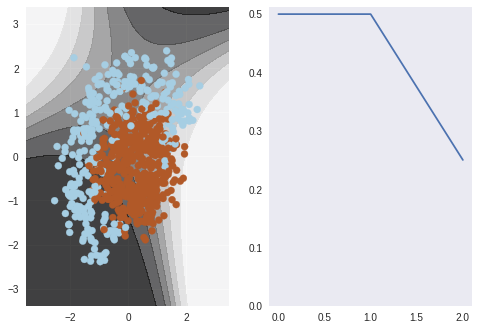

In [43]:
visualize(X, y, w, [0.5, 0.5, 0.25])

## Mini-batch SGD

Stochastic gradient descent just takes a random example on each iteration, calculates a gradient of the loss on it and makes a step:
$$ w_t = w_{t-1} - \eta \dfrac{1}{m} \sum_{j=1}^m \nabla_w L(w_t, x_{i_j}, y_{i_j}) $$



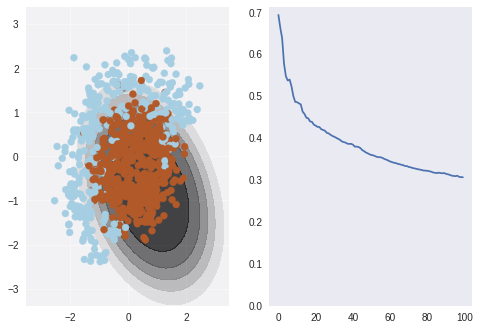

In [44]:
# please use np.random.seed(42), eta=0.1, n_iter=100 and batch_size=4 for deterministic results

np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta= 0.1 # learning rate

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    #print(i,'   ', X_expanded.shape[0],'  ',batch_size)
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    # TODO:<your code here>
    #m = 1/batch_size
    grad =  np.dot((probability(X_expanded[ind, :], w)-y[ind]),X_expanded[ind, :])
 
    Wg = eta*(1/batch_size)*grad
    w = w-Wg
    

visualize(X, y, w, loss)
plt.clf()

## SGD with momentum

Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations as can be seen in image below. It does this by adding a fraction $\alpha$ of the update vector of the past time step to the current update vector.
<br>
<br>

$$ \nu_t = \alpha \nu_{t-1} + \eta\dfrac{1}{m} \sum_{j=1}^m \nabla_w L(w_t, x_{i_j}, y_{i_j}) $$
$$ w_t = w_{t-1} - \nu_t$$

<br>




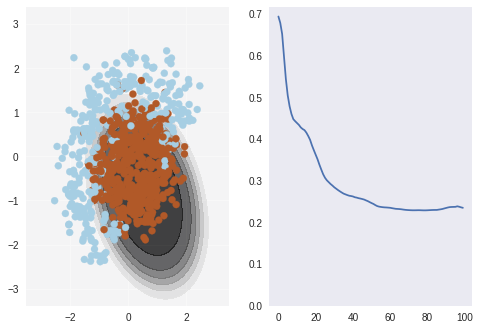

In [45]:
# please use np.random.seed(42), eta=0.05, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.05 # learning rate
alpha = 0.9 # momentum
nu = np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    # TODO:<your code here>
    gt =  np.dot((probability(X_expanded[ind, :], w)-y[ind]),X_expanded[ind, :])
    nu = alpha*nu + eta*(1/batch_size)*gt
    w = w-nu

visualize(X, y, w, loss)
plt.clf()

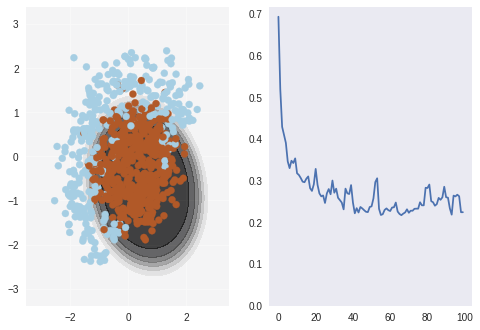

In [46]:
# please use np.random.seed(42), eta=0.1, alpha=0.9, n_iter=100 and batch_size=4 for deterministic results
np.random.seed(42)

w = np.array([0, 0, 0, 0, 0, 1.])

eta = 0.1 # learning rate
alpha = 0.9 # moving average of gradient norm squared
g2 = np.zeros_like(w)
eps = 1e-8

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    # TODO:<your code here>
    for j in ind:
        gtj =  np.dot((probability(X_expanded[j, :], w)-y[j]),X_expanded[j, :])
        g2 = alpha*g2 +(1-alpha)*np.square(gtj)
        w = w-(eta/np.sqrt(g2+eps))*gtj

        
    
visualize(X, y, w, loss)
plt.clf()